<h1>Extracting and Visualizing Stock Data using Python library and Webscraping</h1>

<h3>Extracting Stock Data Using a Python Library</h3>


A company's stock share (also known as equity) is a piece of the company, it's basically a security that represents the ownership of a fraction of a corporation. This entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares."
An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges.
Dividends are the distribution of a company's profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns.
As a data scientist working for a hedge fund determine any suspicious stock activity.

Using the 'yfinance' library to extract data for stocks and return the data in a pandas dataframe. 

In [1]:
!pip install yfinance==0.2.4
!pip install pandas==1.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 67.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [2]:
import yfinance as yf
import pandas as pd

In [3]:
# creating object that will allow us to access functions to extract data
# for the company is Apple using the ticker symbol AAPL
apple = yf.Ticker("AAPL")

In [4]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2024-05-22 04:26:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json.2’

apple.json.2        100%[===================>]   5.57K  --.-KB/s    in 0s      

2024-05-22 04:26:17 (55.3 MB/s) - ‘apple.json.2’ saved [5699/5699]



In [5]:
# extracting information about the stock as a Python dictionary
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [6]:
apple_info['country']

'United States'

In [7]:
# extracting share price
apple_share_price_data = apple.history(period="max")

In [8]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0


In [9]:
apple_share_price_data.reset_index(inplace=True)

<AxesSubplot:xlabel='Date'>

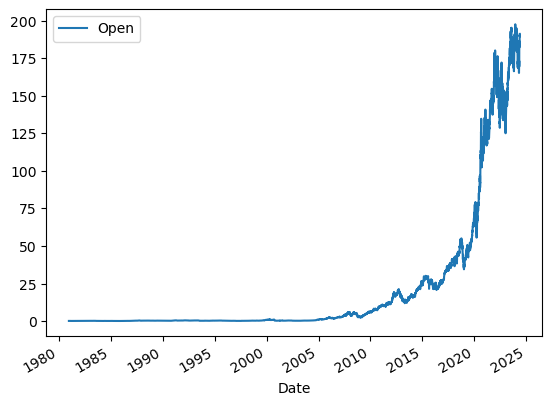

In [10]:
# price vs date
apple_share_price_data.plot(x="Date", y="Open")

In [11]:
# extracting dividends
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
Name: Dividends, Length: 83, dtype: float64

<AxesSubplot:xlabel='Date'>

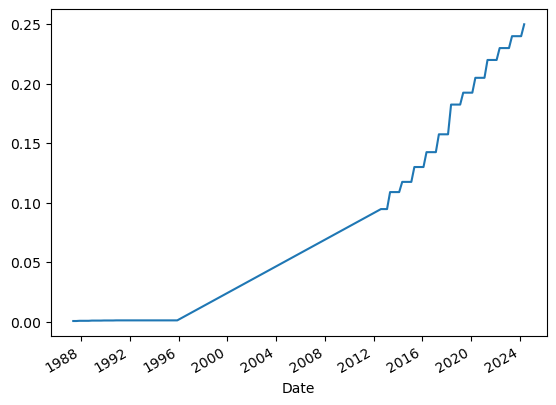

In [12]:
# plot dividends
apple.dividends.plot()

In [13]:
# creating an object for AMD (Advanced Micro Devices) using ticker symbol AMD using the Ticker module
amd = yf.Ticker("AMD")
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2024-05-22 04:46:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json.2’

amd.json.2          100%[===================>]   5.70K  --.-KB/s    in 0s      

2024-05-22 04:46:08 (51.2 MB/s) - ‘amd.json.2’ saved [5838/5838]



In [14]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [15]:
# find the country the stock belongs to
amd_info['country']

'United States'

In [16]:
# find the sector the stock belongs to
amd_info['sector']

'Technology'

In [17]:
# stock data for AMD 
max_period = amd.history(period="max")

In [18]:
# the volume traded on the first day
max_period['Volume'].head(1)

Date
1980-03-17 00:00:00-05:00    219600
Name: Volume, dtype: int64

<h3>Extracting Stock Data Using Webscraping</h3>


In [19]:
!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.6.4
!pip install plotly==5.3.1
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 3.1.0
    Uninstalling charset-normalizer-3.1.0:
      Successfully uninstalled charset-normalizer-3.1.0
  Attempting uninstall: requests
    Found existing installation: requests 2.29.0
    Uninstalling requests-2.29.0:
      Successfully uninstalled requests-2.29.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibm-cos-sdk-core 2.13.0 requires requests<3.0,>=2.28.1, but you have requests 2.26.0 which is incompatible.

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o

In [20]:
!pip install --upgrade beautifulsoup4 lxml
!pip install dash-core-components==2.0.0 dash-html-components==2.0.0 dash-table==5.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 85.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.4
    Uninstalling lxml-4.6.4:
      Successfully uninstalled lxml-4.6.4
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


In [22]:
import bs4
import lxml
from dash import dcc
from dash import html
from dash import dash_table
print("BeautifulSoup version:", bs4.__version__)
print("lxml version:", lxml.__version__)
print("Dash Core Components version:", dash_core_components.__version__)
print("Dash HTML Components version:", dash_html_components.__version__)
print("Dash Table version:", dash_table.__version__)

BeautifulSoup version: 4.10.0
lxml version: 4.6.4
Dash Core Components version: 2.9.2
Dash HTML Components version: 2.0.11
Dash Table version: 5.2.4


In [23]:
# use the request library to send HTTP request to the web page
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

In [24]:
# extracting the HTML content as a string for better readability
data  = requests.get(url).text
print(data)

<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="NFLX, Netflix, Inc., NFLX historical prices, Netflix, Inc. historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><met

In [25]:
# creating a BeautifulSoup object using BeautifulSoup library and html5lib parser
soup = BeautifulSoup(data, 'html5lib')

In [26]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

In [27]:
# Isolate the body of the table which contains all the information and then loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    # Finally append the data of each row to the table
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)    

In [28]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [29]:
# find list of all tables in the webpage
read_html_pandas_data = pd.read_html(url)

In [30]:
read_html_pandas_data = pd.read_html(str(soup))

In [31]:
# extracting first table data
netflix_dataframe = read_html_pandas_data[0]
netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


In [32]:
# use webscraping to extact stock data
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"
html_data = requests.get(url2).text
print("text response saved to html_data variable")

text response saved to html_data variable


In [33]:
# parse the html data
beautiful_soup = BeautifulSoup(html_data, 'html5lib')

In [34]:
# find content of the 'title' attribute
print("the content of title attribute is: \n")
beautiful_soup.find('title')

the content of title attribute is: 



<title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title>

In [35]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in beautiful_soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [36]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","71,528,900","3,206.20"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","77,556,200","3,256.93"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","90,810,500","3,168.04"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","116,226,100","3,036.15"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","115,899,300","3,148.73"


In [37]:
print("Columns are:")
amazon_data.columns

Columns are:


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

<h3>Extracting and Visualizing Stock Data</h3>

In [38]:
!pip install nbformat==4.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 23.9 MB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.8.0
    Uninstalling nbformat-5.8.0:
      Successfully uninstalled nbformat-5.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.24.0 requires nbformat>=5.2.0, but you have nbformat 4.2.0 which is incompatible.
nbclient 0.7.4 requires nbformat>=5.1, but you have nbformat 4.2.0 which is incompatible.
nbconvert 7.4.0 requires nbformat>=5.1, but you have nbformat 4.2.0 which is incompatible.


In [39]:
!pip install --upgrade nbformat
!pip install --upgrade jupyter-server nbclient nbconvert

  Using cached nbformat-5.8.0-py3-none-any.whl (77 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 4.2.0
    Uninstalling nbformat-4.2.0:
      Successfully uninstalled nbformat-4.2.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 21.8 MB/s eta 0:00:00
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 7.4.0
    Uninstalling nbconvert-7.4.0:
      Successfully uninstalled nbconvert-7.4.0


In [40]:
import nbformat
import nbclient
import nbconvert
import jupyter_server
print("nbformat version:", nbformat.__version__)
print("nbclient version:", nbclient.__version__)
print("nbconvert version:", nbconvert.__version__)
print("jupyter-server version:", jupyter_server.__version__)

nbformat version: 5.8.0
nbclient version: 0.7.4
nbconvert version: 7.6.0
jupyter-server version: 1.24.0


In [41]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [42]:
# define graphing function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [43]:
# extracting Tesla Stock data
tesla = yf.Ticker("TSLA")

In [44]:
tesla_data = tesla.history(period="max")

In [45]:
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-15 00:00:00-04:00,179.899994,180.000000,173.110001,173.990005,79663000,0.0,0.0
2024-05-16 00:00:00-04:00,174.100006,175.789993,171.429993,174.839996,59812200,0.0,0.0
2024-05-17 00:00:00-04:00,173.550003,179.630005,172.750000,177.460007,77445800,0.0,0.0


In [46]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [51]:
html_data = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm').text

In [52]:
soup2 = BeautifulSoup(html_data,"lxml")

In [53]:
tesla_revenue = pd.DataFrame(columns=['Date','Revenue'])

rows = soup2.find_all('tbody')[1]
for row in rows:
    if type(row) == bs4.element.Tag:
        col = row.find_all('td')
        date = col[0].text
        revenue = col[1].text
        tesla_revenue = tesla_revenue.append({'Date':date,'Revenue':revenue}, ignore_index=True)

tesla_revenue

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


In [54]:
# remove the comma and dollar sign from the Revenue column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [55]:
# remove null and empty strings
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [56]:
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [57]:
# extracting GameStop Stock data
GameStop = yf.Ticker("GME")

In [58]:
# obtain information for the maximum amount of time
gme_data = GameStop.history(period = "max")
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-15 00:00:00-04:00,40.310001,42.349998,31.000000,39.549999,131790100,0.0,0.0
2024-05-16 00:00:00-04:00,33.980000,35.240002,27.590000,27.670000,76177600,0.0,0.0
2024-05-17 00:00:00-04:00,21.860001,22.410000,19.700001,22.209999,96079600,0.0,0.0


In [64]:
# extracting GME Revenue Data using webscraping
res = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html').text

In [65]:
# parse the html data
soup3 = BeautifulSoup(res,"lxml")

In [67]:
gme_revenue = pd.DataFrame(columns=['Date','Revenue'])

rows  = soup3.find_all('tbody')[1]
for row in rows:
    if type(row) == bs4.element.Tag:
        col = row.find_all('td')
        date = col[0].text
        revenue = col[1].text
        gme_revenue = gme_revenue.append({'Date':date,'Revenue':revenue}, ignore_index=True)

gme_revenue

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"
...,...,...
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475


In [68]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [69]:
gme_revenue.head()

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


In [70]:
# plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

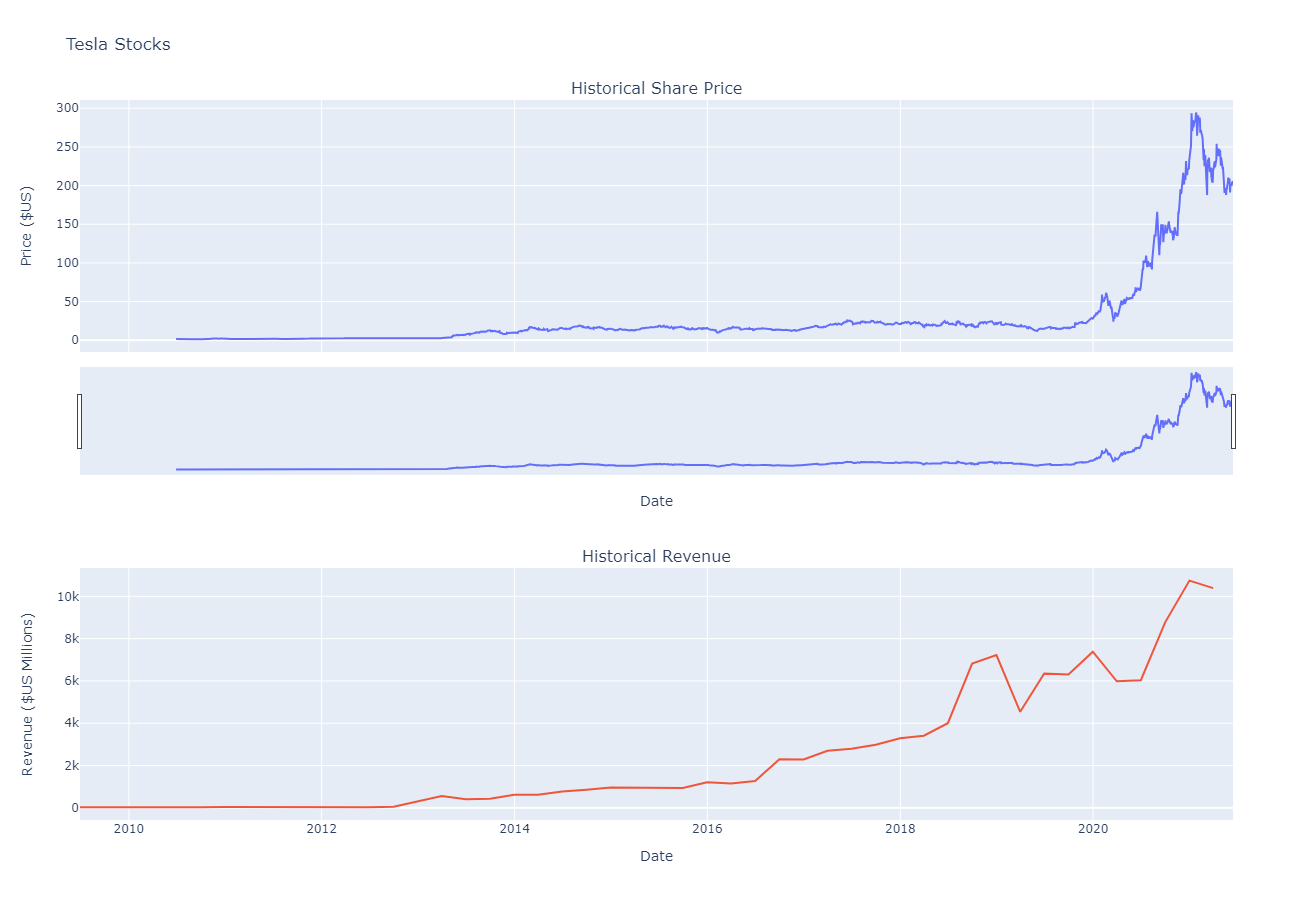

In [85]:
# Tesla Stock graph using make_graph function
make_graph(tesla_data, tesla_revenue, 'Tesla Stocks')

In [92]:
gme_data.reset_index(inplace=True)

In [93]:
gme_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...,...
5601,2024-05-15 00:00:00-04:00,40.310001,42.349998,31.000000,39.549999,131790100,0.0,0.0
5602,2024-05-16 00:00:00-04:00,33.980000,35.240002,27.590000,27.670000,76177600,0.0,0.0
5603,2024-05-17 00:00:00-04:00,21.860001,22.410000,19.700001,22.209999,96079600,0.0,0.0
5604,2024-05-20 00:00:00-04:00,21.540001,23.400000,18.940001,23.139999,55261600,0.0,0.0


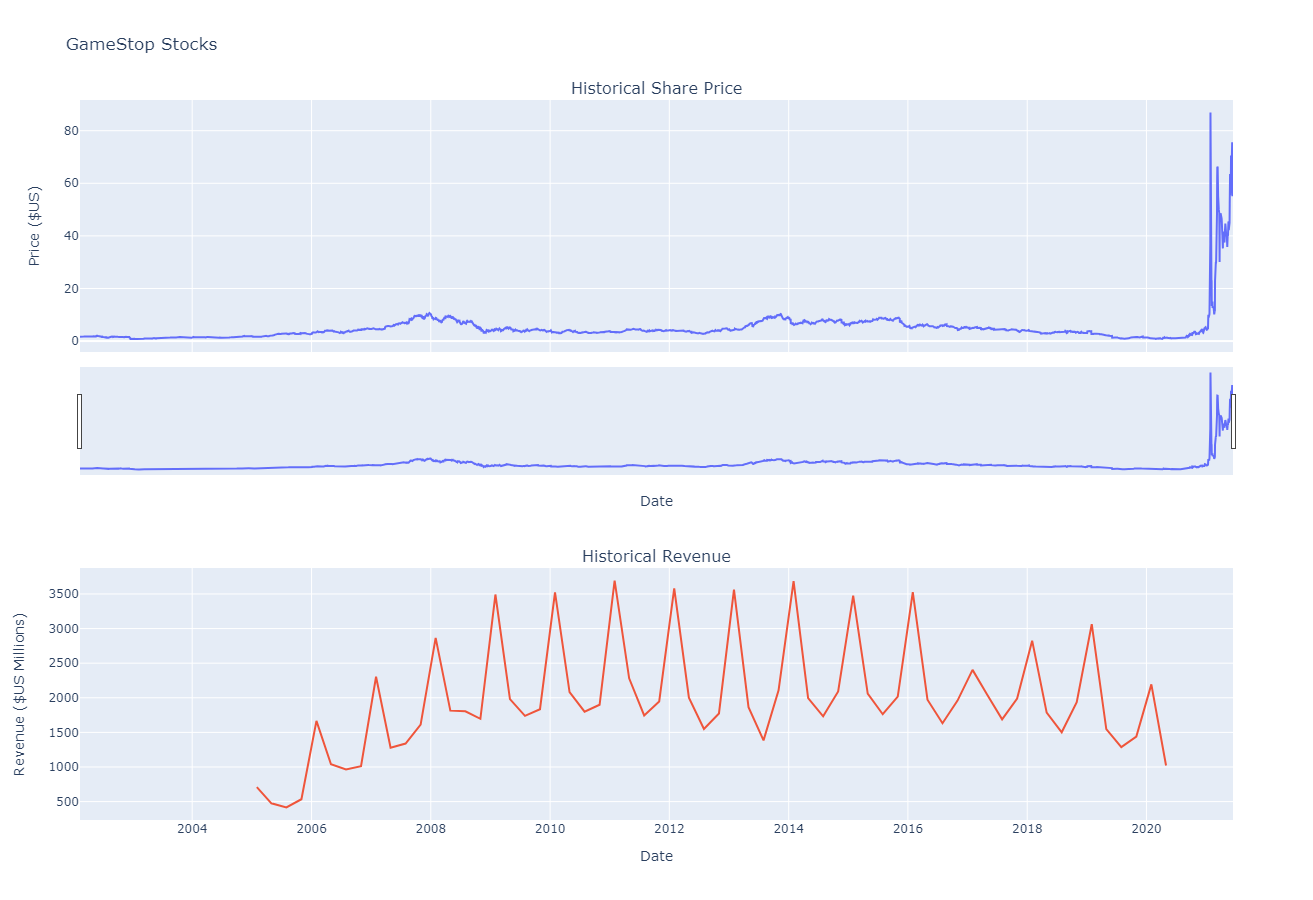

In [94]:
# GameStop Stock graph using make_graph function
make_graph(gme_data, gme_revenue, 'GameStop Stocks')